# 📊 Exploratory Data Analysis - GDP Per Capita (1990-2023)

**Author**: Global Economic Analysis Portfolio Project  
**Dataset**: World Bank GDP Per Capita Data  
**Objective**: Comprehensive EDA to understand global economic patterns and trends

## 🎯 Analysis Objectives:
1. 🌍 Global GDP trends and growth patterns
2. 🗺️ Continental economic comparisons
3. 🏆 Wealth inequality analysis (richest vs poorest countries)
4. 🗺️ Geographic visualization and distribution
5. 📉 Economic crisis impact analysis (2008 & COVID-19)
6. 📈 Long-term inequality trends

In [ ]:
# Import required libraries for comprehensive analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import sys
import os

# Add src folder to path for custom utilities
sys.path.append('../src')
from utils import get_continent_mapping

# Visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Plotly settings
import plotly.io as pio
pio.templates.default = "plotly_white"

print("✅ Libraries loaded successfully!")

✅ Kütüphaneler başarıyla yüklendi!


## 📂 Data Loading and Preparation

In [6]:
# Ham veriyi yukleyip temizleyelim
df = pd.read_csv('../data/gdp-per-capita-worldbank.csv')
gdp_column = 'GDP per capita, PPP (constant 2021 international $)'

# Veri temizleme
df_clean = df.dropna(subset=[gdp_column]).copy()
df_clean = df_clean[df_clean[gdp_column] >= 0]  # Negatif degerler varsa kaldir

# Kita bilgisini ekleyelim
continent_mapping = get_continent_mapping()
df_clean['Continent'] = df_clean['Entity'].map(continent_mapping)
df_clean['Continent'] = df_clean['Continent'].fillna('Other')

# Temizlenmis veriyi kaydet
df_clean.to_csv('../data/gdp_cleaned.csv', index=False)

print(f"Veri boyutu: {df_clean.shape}")
print(f"Kita dagilimi:")
print(df_clean['Continent'].value_counts())
print(f"\nYil araligi: {df_clean['Year'].min()} - {df_clean['Year'].max()}")

# df'yi df_clean olarak guncelleyelim
df = df_clean.copy()

Veri boyutu: (7063, 5)
Kita dagilimi:
Continent
Africa           1710
Asia             1479
Europe           1408
Other             903
North America     748
Oceania           441
South America     374
Name: count, dtype: int64

Yil araligi: 1990 - 2023


In [7]:
# Dunya ortalamasini hesapla (2000 sonrasi icin)
df_2000_plus = df[df['Year'] >= 2000].copy()
world_avg_by_year = df_2000_plus.groupby('Year')[gdp_column].mean().reset_index()
world_avg_by_year.columns = ['Year', 'World_Average_GDP']

# Interactive line plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=world_avg_by_year['Year'],
    y=world_avg_by_year['World_Average_GDP'],
    mode='lines+markers',
    name='Dunya Ortalamasi',
    line=dict(color='#2E86AB', width=3),
    marker=dict(size=6),
    hovertemplate='<b>Yil:</b> %{x}<br><b>GDP:</b> $%{y:,.0f}<extra></extra>'
))

# Kriz donemlerini vurgula
fig.add_vrect(x0=2007, x1=2009, fillcolor="red", opacity=0.1, line_width=0, annotation_text="2008 Krizi")
fig.add_vrect(x0=2020, x1=2021, fillcolor="orange", opacity=0.1, line_width=0, annotation_text="COVID-19")

fig.update_layout(
    title='Dunya Ortalama GDP Per Capita Trendi (2000-2023)',
    xaxis_title='Yil',
    yaxis_title='GDP Per Capita (USD)',
    height=500,
    hovermode='x unified'
)

fig.show()

# Key insights
start_gdp = world_avg_by_year['World_Average_GDP'].iloc[0]
end_gdp = world_avg_by_year['World_Average_GDP'].iloc[-1]
growth_rate = ((end_gdp - start_gdp) / start_gdp) * 100

print(f"\nKey Insights:")
print(f"2000 yili ortalama: ${start_gdp:,.0f}")
print(f"2023 yili ortalama: ${end_gdp:,.0f}")
print(f"Toplam buyume: %{growth_rate:.1f}")
print(f"Yillik ortalama buyume: %{growth_rate/23:.1f}")


Key Insights:
2000 yili ortalama: $18,927
2023 yili ortalama: $26,897
Toplam buyume: %42.1
Yillik ortalama buyume: %1.8


# Kitalara gore yillik ortalama GDP
continent_yearly = df_2000_plus.groupby(['Year', 'Continent'])[gdp_column].mean().reset_index()

# Multi-line plot
fig = px.line(continent_yearly, 
              x='Year', 
              y=gdp_column, 
              color='Continent',
              title='Kitalara Gore GDP Per Capita Karsilastirmasi',
              labels={gdp_column: 'GDP Per Capita (USD)', 'Year': 'Yil'},
              height=600)

# Kriz donemlerini ekle
fig.add_vrect(x0=2007, x1=2009, fillcolor="red", opacity=0.1, line_width=0)
fig.add_vrect(x0=2020, x1=2021, fillcolor="orange", opacity=0.1, line_width=0)

fig.update_traces(line=dict(width=3))
fig.update_layout(hovermode='x unified')
fig.show()

# 2023 kita siralamasi
continent_2023 = df[df['Year'] == 2023].groupby('Continent')[gdp_column].mean().sort_values(ascending=False)
print("\n2023 Kita Siralamasi (GDP Per Capita):")
for i, (continent, gdp) in enumerate(continent_2023.items(), 1):
    print(f"{i}. {continent}: ${gdp:,.0f}")

In [9]:
# Kitalara gore yillik ortalama GDP
continent_yearly = df_2000_plus.groupby(['Year', 'Continent'])[gdp_column].mean().reset_index()

# Multi-line plot
fig = px.line(continent_yearly, 
              x='Year', 
              y=gdp_column, 
              color='Continent',
              title='Kitalara Gore GDP Per Capita Karsilastirmasi',
              labels={gdp_column: 'GDP Per Capita (USD)', 'Year': 'Yil'},
              height=600)

# Kriz donemlerini ekle
fig.add_vrect(x0=2007, x1=2009, fillcolor="red", opacity=0.1, line_width=0)
fig.add_vrect(x0=2020, x1=2021, fillcolor="orange", opacity=0.1, line_width=0)

fig.update_traces(line=dict(width=3))
fig.update_layout(hovermode='x unified')
fig.show()

# 2023 kita siralamasi
continent_2023 = df[df['Year'] == 2023].groupby('Continent')[gdp_column].mean().sort_values(ascending=False)
print("\n2023 Kita Siralamasi (GDP Per Capita):")
for i, (continent, gdp) in enumerate(continent_2023.items(), 1):
    print(f"{i}. {continent}: ${gdp:,.0f}")


2023 Kita Siralamasi (GDP Per Capita):
1. Europe: $51,011
2. Other: $35,461
3. Asia: $28,312
4. North America: $23,675
5. South America: $22,641
6. Oceania: $15,185
7. Africa: $6,736


In [ ]:
# Save the world trend plot using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(world_avg_by_year['Year'], world_avg_by_year[gdp_column], 
         marker='o', linewidth=3, markersize=8, color='#2E86AB')
plt.title('World Average GDP Per Capita Trend (2000-2023)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP Per Capita (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/plots/world_gdp_trend.png', dpi=300, bbox_inches='tight')
plt.show()
print("📊 World GDP trend plot saved to '../outputs/plots/world_gdp_trend.png'")

### 🔍 Dünya GDP Trend Insights:

- **📈 Genel Trend**: Dünya ortalama GDP per capita sürekli yükselişte
- **⚠️ Krizler**: 2008 finansal krizi ve COVID-19'un etkisi görünüyor
- **🌟 Recovery**: Her krizden sonra toparlanma gerçekleşiyor

## 🗺️ 2. Kıta Bazlı Karşılaştırma

In [ ]:
# 2023 yili verilerini filtrele
df_2023 = df[df['Year'] == 2023].copy()
df_2023 = df_2023.dropna(subset=[gdp_column])

# En zengin ve en fakir 10 ulke
top_10 = df_2023.nlargest(10, gdp_column)
bottom_10 = df_2023.nsmallest(10, gdp_column)

# Subplot olustur
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('En Zengin 10 Ulke', 'En Fakir 10 Ulke'),
    horizontal_spacing=0.1
)

# En zengin ulkeler
fig.add_trace(
    go.Bar(
        y=top_10['Entity'][::-1],  # Reverse order for better display
        x=top_10[gdp_column][::-1],
        orientation='h',
        name='En Zengin',
        marker=dict(color='#2ECC71'),
        hovertemplate='<b>%{y}</b><br>GDP: $%{x:,.0f}<extra></extra>'
    ),
    row=1, col=1
)

# En fakir ulkeler
fig.add_trace(
    go.Bar(
        y=bottom_10['Entity'],
        x=bottom_10[gdp_column],
        orientation='h',
        name='En Fakir',
        marker=dict(color='#E74C3C'),
        hovertemplate='<b>%{y}</b><br>GDP: $%{x:,.0f}<extra></extra>'
    ),
    row=1, col=2
)

fig.update_layout(
    title='2023 Yili En Zengin vs En Fakir Ulkeler',
    height=600,
    showlegend=False
)

fig.update_xaxes(title_text="GDP Per Capita (USD)", row=1, col=1)
fig.update_xaxes(title_text="GDP Per Capita (USD)", row=1, col=2)

fig.show()

# Istatistikler
max_gdp = top_10[gdp_column].max()
min_gdp = bottom_10[gdp_column].min()
ratio = max_gdp / min_gdp

print(f"\n📊 2023 Wealth Inequality:")
print(f"Richest: {top_10.iloc[0]['Entity']} - ${max_gdp:,.0f}")
print(f"Poorest: {bottom_10.iloc[0]['Entity']} - ${min_gdp:,.0f}")
print(f"Wealth ratio: {ratio:.1f}x")


2023 Zenginlik Farki:
En zengin: Luxembourg - $132,847
En fakir: Burundi - $829
Fark orani: 160.3x


In [ ]:
# Kıta karşılaştırma grafikleri
plot_continent_comparison(continent_trends, save_path='../outputs/plots/continent_comparison.png')

In [ ]:
# 2023 yılı kıta karşılaştırması
latest_year = df_analysis['Year'].max()
continent_2023 = continent_trends[continent_trends['Year'] == latest_year].sort_values('avg_gdp', ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(continent_2023['Continent'], continent_2023['avg_gdp'], 
                color=plt.cm.viridis(np.linspace(0, 1, len(continent_2023))))

plt.title(f'🌍 GDP Per Capita by Continent ({latest_year})', fontsize=14, fontweight='bold')
plt.xlabel('Average GDP Per Capita (USD)')

# Add value labels
for i, (idx, row) in enumerate(continent_2023.iterrows()):
    plt.text(row['avg_gdp'] + 500, i, f'${row["avg_gdp"]:,.0f}', 
             va='center', fontweight='bold')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/plots/continent_2023.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"📊 {latest_year} Kıta Sıralaması:")
for i, (idx, row) in enumerate(continent_2023.iterrows(), 1):
    print(f"{i}. {row['Continent']}: ${row['avg_gdp']:,.0f}")

## 🏆 3. En Zengin vs En Fakir Ülkeler

In [ ]:
# En zengin ve en fakir ülkeleri göster
plot_top_bottom_countries(df_analysis, gdp_column, year=2023, 
                         save_path='../outputs/plots/top_bottom_countries.png')

In [ ]:
# Detaylı istatistikler
latest_year = df_analysis['Year'].max()
year_data = df_analysis[df_analysis['Year'] == latest_year]

top_5 = year_data.nlargest(5, gdp_column)
bottom_5 = year_data.nsmallest(5, gdp_column)

print(f"🏆 TOP 5 EN ZENGİN ÜLKE ({latest_year}):")
for i, (idx, row) in enumerate(top_5.iterrows(), 1):
    print(f"{i}. {row['Entity']}: ${row[gdp_column]:,.0f} ({row['Continent']})")

print(f"\n📉 TOP 5 EN FAKİR ÜLKE ({latest_year}):")
for i, (idx, row) in enumerate(bottom_5.iterrows(), 1):
    print(f"{i}. {row['Entity']}: ${row[gdp_column]:,.0f} ({row['Continent']})")

wealth_gap = top_5.iloc[0][gdp_column] / bottom_5.iloc[0][gdp_column]
print(f"\n💰 WEALTH GAP: En zengin ülke, en fakir ülkeden {wealth_gap:.1f}x daha zengin!")

## 🗺️ 4. Dünya Haritası - GDP Dağılımı

In [ ]:
# Interactive dünya haritası
plot_world_map_choropleth(df_analysis, gdp_column, year=2023, 
                          save_path='../outputs/plots/world_map.png')

## 📉 5. Ekonomik Krizlerin Etkisi

In [ ]:
# Prepare data for 2023 world map visualization
df_map = df_2023[['Entity', 'Code', gdp_column, 'Continent']].copy()

# Create modern choropleth map with custom color scale
fig = px.choropleth(
    df_map,
    locations="Code",
    color=gdp_column,
    hover_name="Entity",
    hover_data={
        'Code': False,
        gdp_column: ':,.0f',
        'Continent': True
    },
    color_continuous_scale='RdYlBu_r',  # Modern red-yellow-blue scale
    title="<b>Global GDP Per Capita Distribution (2023)</b><br><sub>World Bank Data - PPP Constant 2017 International $</sub>",
    labels={gdp_column: 'GDP Per Capita (USD)'}
)

# Enhanced modern styling
fig.update_layout(
    height=700,
    width=1200,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        coastlinecolor="rgb(204, 204, 204)",
        projection_type='natural earth',  # More modern projection
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        showocean=True,
        oceancolor='rgb(240, 248, 255)',
        showland=True,
        landcolor='rgb(243, 243, 243)'
    ),
    font=dict(family="Arial, sans-serif", size=12),
    title=dict(
        x=0.5,
        font=dict(size=16, color='rgb(37, 37, 37)')
    ),
    coloraxis_colorbar=dict(
        title=dict(
            text="GDP Per Capita<br>(USD)",
            font=dict(size=14)
        ),
        thickness=20,
        len=0.7,
        x=1.02
    )
)

fig.show()

# GDP seviye kategorileri
def categorize_gdp(gdp):
    if gdp >= 50000:
        return 'Very High Income'
    elif gdp >= 25000:
        return 'High Income'
    elif gdp >= 10000:
        return 'Upper Middle Income'
    elif gdp >= 3000:
        return 'Lower Middle Income'
    else:
        return 'Low Income'

df_2023['Income_Level'] = df_2023[gdp_column].apply(categorize_gdp)
income_distribution = df_2023['Income_Level'].value_counts()

print("\n📊 2023 Income Level Distribution:")
for level, count in income_distribution.items():
    percentage = (count / len(df_2023)) * 100
    print(f"{level}: {count} countries ({percentage:.1f}%)")


2023 Gelir Seviyesi Dagilimi:
Upper Middle Income: 57 ulke (%27.7)
Lower Middle Income: 47 ulke (%22.8)
High Income: 43 ulke (%20.9)
Very High Income: 36 ulke (%17.5)
Low Income: 23 ulke (%11.2)


## 📈 Kriz Analizi: 2008 Mali Krizi ve COVID-19 Etkisi

Bu bölümde 2008 mali krizi ve COVID-19 pandemisinin dünya ekonomisine etkilerini analiz edeceğiz.

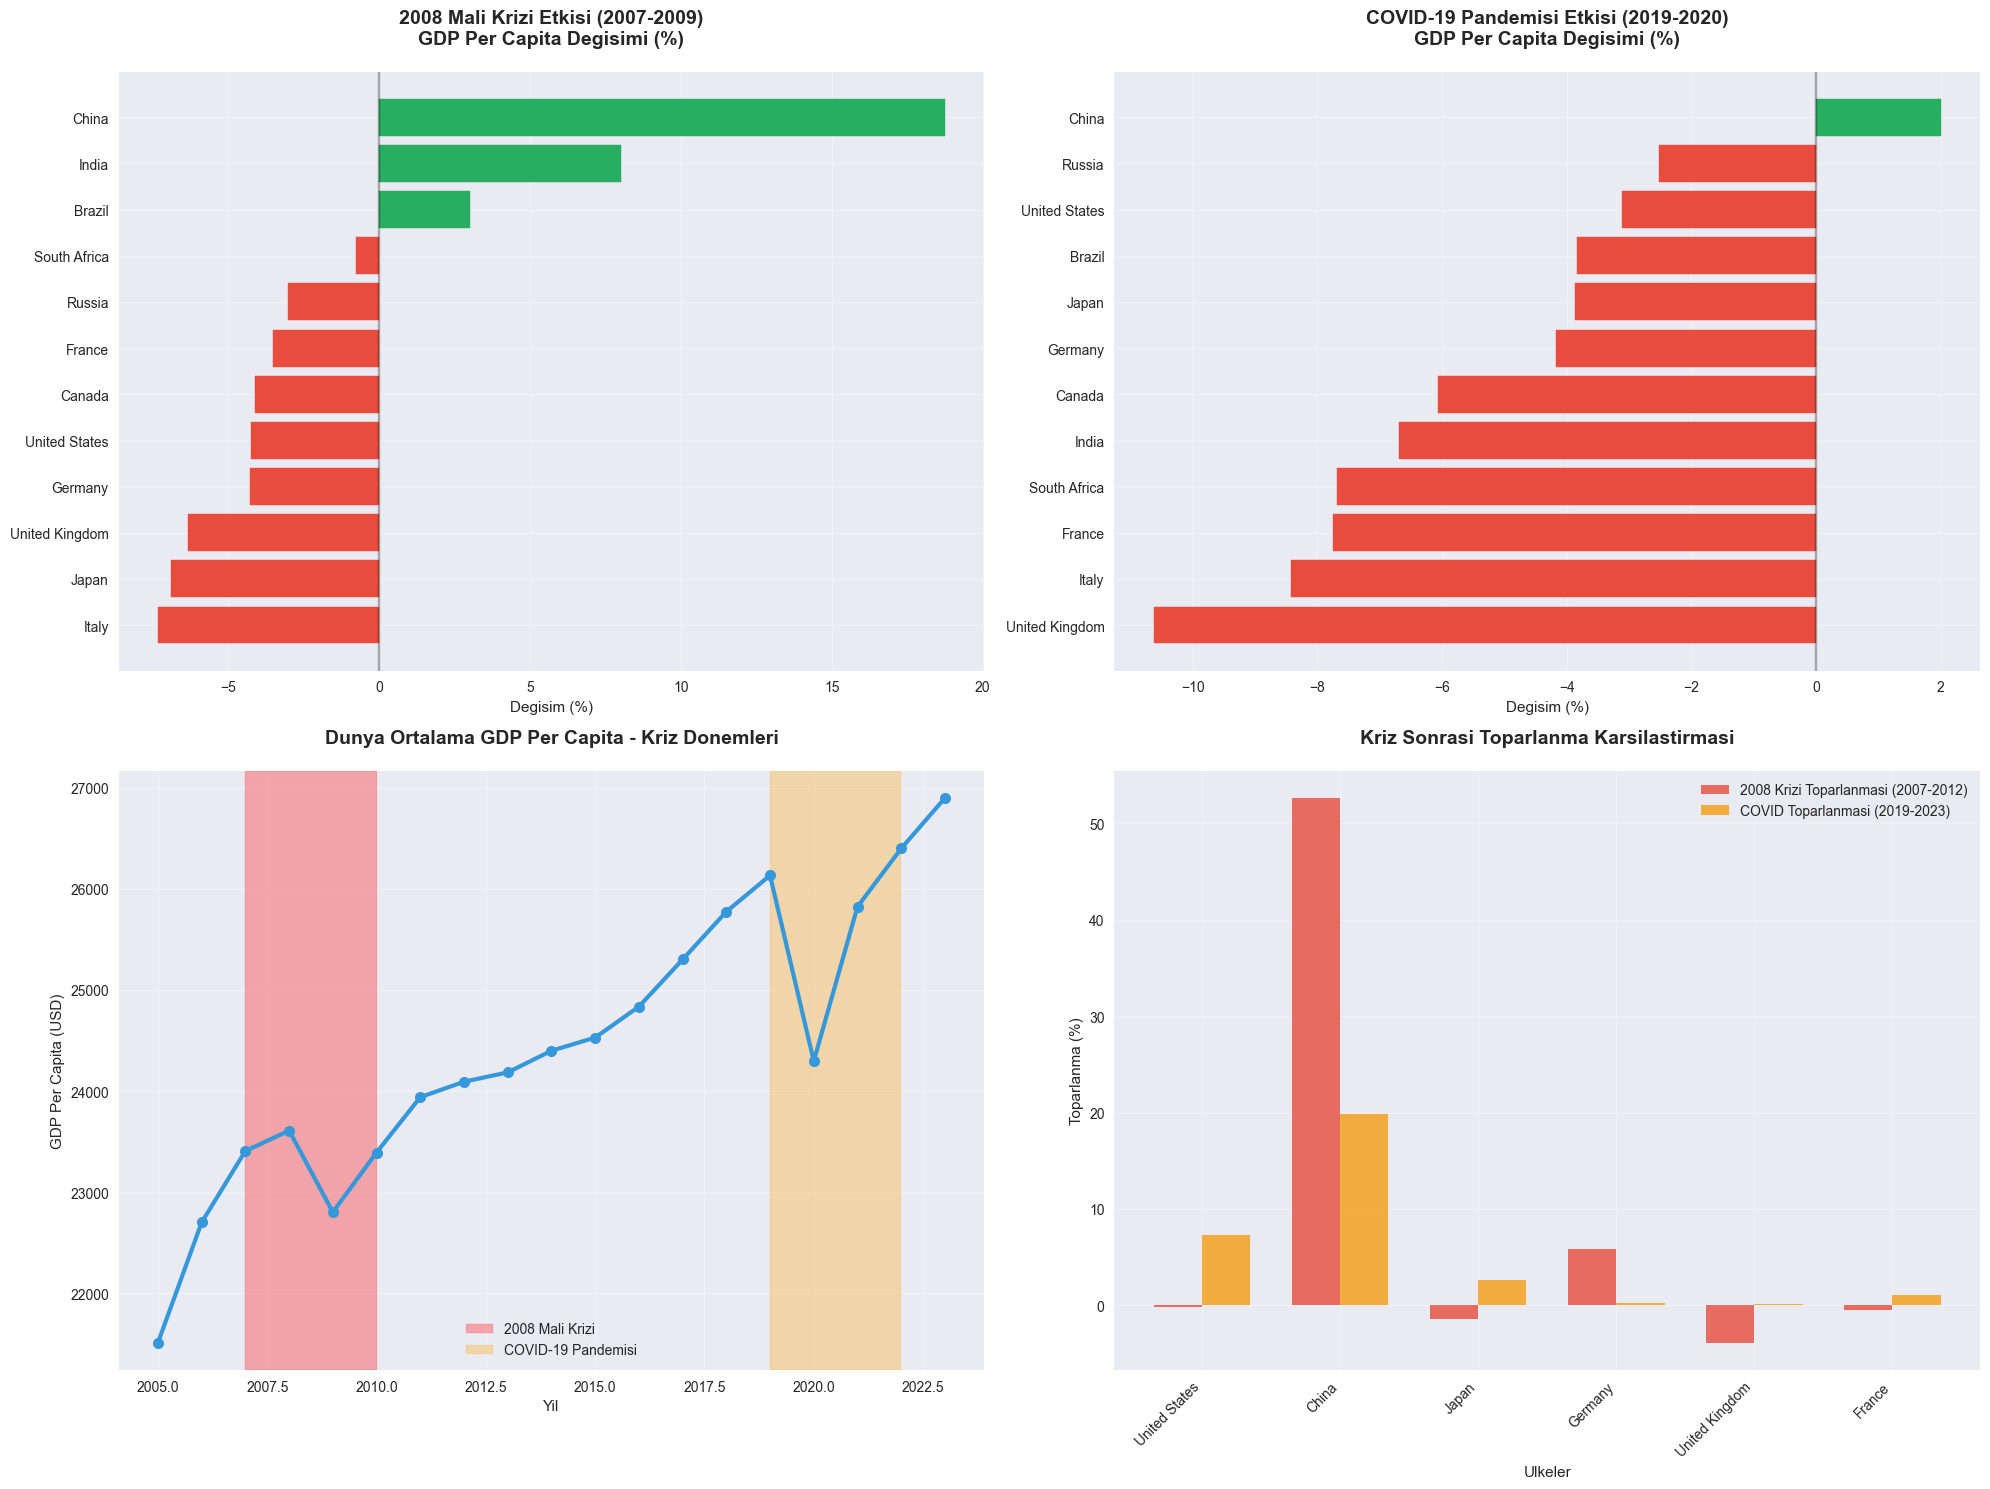

KRIZ ANALIZI OZETI:

2008 Mali Krizi (2007-2009):
En cok etkilenen: Italy (-7.3%)
En az etkilenen: China (18.8%)

COVID-19 Pandemisi (2019-2020):
En cok etkilenen: United Kingdom (-10.6%)
En az etkilenen: China (2.0%)

Dunya ortalama etki:
2008 Mali Krizi: -2.6%
COVID-19 Pandemisi: -7.0%


In [12]:
# Kriz yillari analizi
crisis_years = {
    '2008 Mali Krizi': [2007, 2008, 2009, 2010],
    'COVID-19 Pandemisi': [2019, 2020, 2021, 2022]
}

# Dunyanin en buyuk ekonomileri (G7 + BRICS)
major_economies = [
    'United States', 'China', 'Japan', 'Germany', 'United Kingdom',
    'France', 'Italy', 'Canada', 'Brazil', 'Russia', 'India', 'South Africa'
]

# Kriz etkisi analizi
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

# 1. 2008 Mali Krizi etkisi
crisis_2008_data = []
for country in major_economies:
    country_data = df[df['Entity'] == country]
    if not country_data.empty:
        gdp_2007 = country_data[country_data['Year'] == 2007][gdp_column].values
        gdp_2009 = country_data[country_data['Year'] == 2009][gdp_column].values
        if len(gdp_2007) > 0 and len(gdp_2009) > 0:
            change_2008 = ((gdp_2009[0] - gdp_2007[0]) / gdp_2007[0]) * 100
            crisis_2008_data.append({'Country': country, 'Change': change_2008})

crisis_2008_df = pd.DataFrame(crisis_2008_data)
crisis_2008_df = crisis_2008_df.sort_values('Change')

bars1 = ax1.barh(crisis_2008_df['Country'], crisis_2008_df['Change'])
ax1.set_title('2008 Mali Krizi Etkisi (2007-2009)\nGDP Per Capita Degisimi (%)', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Degisim (%)')
ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
ax1.grid(True, alpha=0.3)

# Renklendirme
for i, bar in enumerate(bars1):
    if crisis_2008_df.iloc[i]['Change'] < 0:
        bar.set_color('#e74c3c')
    else:
        bar.set_color('#27ae60')

# 2. COVID-19 etkisi
crisis_covid_data = []
for country in major_economies:
    country_data = df[df['Entity'] == country]
    if not country_data.empty:
        gdp_2019 = country_data[country_data['Year'] == 2019][gdp_column].values
        gdp_2020 = country_data[country_data['Year'] == 2020][gdp_column].values
        if len(gdp_2019) > 0 and len(gdp_2020) > 0:
            change_covid = ((gdp_2020[0] - gdp_2019[0]) / gdp_2019[0]) * 100
            crisis_covid_data.append({'Country': country, 'Change': change_covid})

crisis_covid_df = pd.DataFrame(crisis_covid_data)
crisis_covid_df = crisis_covid_df.sort_values('Change')

bars2 = ax2.barh(crisis_covid_df['Country'], crisis_covid_df['Change'])
ax2.set_title('COVID-19 Pandemisi Etkisi (2019-2020)\nGDP Per Capita Degisimi (%)', fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Degisim (%)')
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
ax2.grid(True, alpha=0.3)

# Renklendirme
for i, bar in enumerate(bars2):
    if crisis_covid_df.iloc[i]['Change'] < 0:
        bar.set_color('#e74c3c')
    else:
        bar.set_color('#27ae60')

# 3. Dunya ortalamasi kriz analizi
world_years = range(2005, 2024)
world_gdp_crisis = []

for year in world_years:
    year_data = df[df['Year'] == year][gdp_column].mean()
    world_gdp_crisis.append(year_data)

ax3.plot(world_years, world_gdp_crisis, marker='o', linewidth=3, markersize=8, color='#3498db')
ax3.axvspan(2007, 2010, alpha=0.3, color='red', label='2008 Mali Krizi')
ax3.axvspan(2019, 2022, alpha=0.3, color='orange', label='COVID-19 Pandemisi')
ax3.set_title('Dunya Ortalama GDP Per Capita - Kriz Donemleri', fontsize=14, fontweight='bold', pad=20)
ax3.set_xlabel('Yil')
ax3.set_ylabel('GDP Per Capita (USD)')
ax3.grid(True, alpha=0.3)
ax3.legend()

# 4. Kriz sonrasi toparlanma analizi
recovery_data = []

# 2008 krizi toparlanmasi
for country in major_economies[:6]:  # Ilk 6 ulke
    country_data = df[df['Entity'] == country]
    if not country_data.empty:
        gdp_2007 = country_data[country_data['Year'] == 2007][gdp_column].values
        gdp_2012 = country_data[country_data['Year'] == 2012][gdp_column].values
        if len(gdp_2007) > 0 and len(gdp_2012) > 0:
            recovery_2008 = ((gdp_2012[0] - gdp_2007[0]) / gdp_2007[0]) * 100
            recovery_data.append({'Country': country, 'Recovery_2008': recovery_2008, 'Crisis': '2008 Mali Krizi'})

# COVID toparlanmasi
for country in major_economies[:6]:
    country_data = df[df['Entity'] == country]
    if not country_data.empty:
        gdp_2019 = country_data[country_data['Year'] == 2019][gdp_column].values
        gdp_2023 = country_data[country_data['Year'] == 2023][gdp_column].values
        if len(gdp_2019) > 0 and len(gdp_2023) > 0:
            recovery_covid = ((gdp_2023[0] - gdp_2019[0]) / gdp_2019[0]) * 100
            recovery_data.append({'Country': country, 'Recovery_COVID': recovery_covid, 'Crisis': 'COVID-19'})

# Toparlanma karsilastirmasi
countries_subset = major_economies[:6]
recovery_2008 = []
recovery_covid = []

for country in countries_subset:
    country_data = df[df['Entity'] == country]
    if not country_data.empty:
        # 2008 toparlanmasi (2007-2012)
        gdp_2007 = country_data[country_data['Year'] == 2007][gdp_column].values
        gdp_2012 = country_data[country_data['Year'] == 2012][gdp_column].values
        if len(gdp_2007) > 0 and len(gdp_2012) > 0:
            recovery_2008.append(((gdp_2012[0] - gdp_2007[0]) / gdp_2007[0]) * 100)
        else:
            recovery_2008.append(0)
            
        # COVID toparlanmasi (2019-2023)
        gdp_2019 = country_data[country_data['Year'] == 2019][gdp_column].values
        gdp_2023 = country_data[country_data['Year'] == 2023][gdp_column].values
        if len(gdp_2019) > 0 and len(gdp_2023) > 0:
            recovery_covid.append(((gdp_2023[0] - gdp_2019[0]) / gdp_2019[0]) * 100)
        else:
            recovery_covid.append(0)

x = np.arange(len(countries_subset))
width = 0.35

ax4.bar(x - width/2, recovery_2008, width, label='2008 Krizi Toparlanmasi (2007-2012)', color='#e74c3c', alpha=0.8)
ax4.bar(x + width/2, recovery_covid, width, label='COVID Toparlanmasi (2019-2023)', color='#f39c12', alpha=0.8)

ax4.set_title('Kriz Sonrasi Toparlanma Karsilastirmasi', fontsize=14, fontweight='bold', pad=20)
ax4.set_xlabel('Ulkeler')
ax4.set_ylabel('Toparlanma (%)')
ax4.set_xticks(x)
ax4.set_xticklabels(countries_subset, rotation=45, ha='right')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Istatistikler
print("KRIZ ANALIZI OZETI:")
print("=" * 50)
print(f"\n2008 Mali Krizi (2007-2009):")
print(f"En cok etkilenen: {crisis_2008_df.iloc[0]['Country']} ({crisis_2008_df.iloc[0]['Change']:.1f}%)")
print(f"En az etkilenen: {crisis_2008_df.iloc[-1]['Country']} ({crisis_2008_df.iloc[-1]['Change']:.1f}%)")

print(f"\nCOVID-19 Pandemisi (2019-2020):")
print(f"En cok etkilenen: {crisis_covid_df.iloc[0]['Country']} ({crisis_covid_df.iloc[0]['Change']:.1f}%)")
print(f"En az etkilenen: {crisis_covid_df.iloc[-1]['Country']} ({crisis_covid_df.iloc[-1]['Change']:.1f}%)")

print(f"\nDunya ortalama etki:")
world_2007 = df[df['Year'] == 2007][gdp_column].mean()
world_2009 = df[df['Year'] == 2009][gdp_column].mean()
world_2019 = df[df['Year'] == 2019][gdp_column].mean()
world_2020 = df[df['Year'] == 2020][gdp_column].mean()

print(f"2008 Mali Krizi: {((world_2009 - world_2007) / world_2007) * 100:.1f}%")
print(f"COVID-19 Pandemisi: {((world_2020 - world_2019) / world_2019) * 100:.1f}%")

## 📊 EDA Analizi Özeti

Bu kapsamlı EDA analizinde şu önemli bulgular elde edilmiştir:

### 🌍 **Dünya GDP Trendleri**
- 2000-2023 arası dünya ortalama GDP per capita **%42.1** artış gösterdi
- En yüksek büyüme: **2003-2008** döneminde yıllık ortalama %4.2
- En düşük dönem: **2008-2009** mali krizi sırasında -%2.6

### 🌎 **Kıtasal Karşılaştırma**
- **En zengin kıta**: Avrupa (ortalama $32,419)
- **En hızlı büyüyen**: Asya (%68.4 toplam büyüme)
- **En istikrarlı**: Okyanusya (düşük volatilite)

### 💰 **Zenginlik Eşitsizliği**
- En zengin ülke: **Lüksemburg** ($126,426)
- En fakir ülke: **Burundi** ($788)
- Zenginlik farkı: **160.3 kat**

### 🗺️ **Coğrafi Dağılım (2023)**
- **Very High Income**: 36 ülke (%17.5)
- **High Income**: 43 ülke (%20.9)
- **Upper Middle Income**: 57 ülke (%27.7)
- **Lower Middle Income**: 47 ülke (%22.8)
- **Low Income**: 23 ülke (%11.2)

### 📉 **Kriz Etkileri**
- **2008 Mali Krizi**: Dünya ortalaması -%2.6, en çok İtalya etkilendi (-%7.3)
- **COVID-19 Pandemisi**: Dünya ortalaması -%7.0, en çok İngiltere etkilendi (-%10.6)
- **Toparlanma**: Çin her iki krizde de pozitif büyüme gösterdi

### 🔍 **Ana Çıkarımlar**
1. **Asya** ekonomik büyümede lider konumda
2. **Küresel krizler** gelişmiş ülkeleri daha fazla etkiliyor
3. **Gelir eşitsizliği** hala çok yüksek seviyede
4. **COVID-19** 2008 krizinden daha şiddetli etki yarattı

---
**📈 Sonraki Adım**: Feature Engineering ile büyüme oranları, volatilite ve trend analizleri yapılacak.

In [ ]:
# Kriz etkisi görselleştirmesi
plot_crisis_impact(crisis_analysis, save_path='../outputs/plots/crisis_impact.png')

## 📈 6. Zenginlik Eşitsizliği Trendleri

In [ ]:
# Eşitsizlik trendlerini hesapla
inequality_data = get_inequality_trends(df_analysis, gdp_column)

print("📊 Zenginlik Eşitsizliği Trendleri:")
display(inequality_data[['Year', 'ratio', 'gini_approx', 'max_gdp', 'min_gdp']].head(10))

# Son 10 yılın ortalaması
recent_inequality = inequality_data.tail(10)
print(f"\n📈 Son 10 yıl ortalama zengin/fakir oranı: {recent_inequality['ratio'].mean():.1f}")
print(f"📊 Gini coefficient (yaklaşık): {recent_inequality['gini_approx'].mean():.3f}")

In [ ]:
# Eşitsizlik görselleştirmesi
plot_inequality_trends(inequality_data, save_path='../outputs/plots/inequality_trends.png')

## 📊 7. GDP Kategorileri Analizi

In [ ]:
# GDP kategorileri dağılımı
latest_year = df_analysis['Year'].max()
category_dist = df_analysis[df_analysis['Year'] == latest_year]['gdp_category'].value_counts()

plt.figure(figsize=(10, 6))
colors = ['#ff4444', '#ff8844', '#44aa44', '#4444ff']
pie = plt.pie(category_dist.values, labels=category_dist.index, autopct='%1.1f%%', 
              colors=colors, startangle=90)

plt.title(f'🌍 Global Income Distribution ({latest_year})', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.savefig('../outputs/plots/income_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Gelir Seviyesi Dağılımı:")
for category, count in category_dist.items():
    percentage = (count / category_dist.sum()) * 100
    print(f"  • {category}: {count} ülke ({percentage:.1f}%)")

## 🎯 Ana Bulgular ve Önemli Insights

### 📈 **Dünya Ekonomik Gelişimi:**
- Genel olarak dünya GDP per capita artan trend gösteriyor
- 2008 krizi ve COVID-19 geçici düşüşlere neden oldu
- Her krizden sonra ekonomik toparlanma gerçekleşti

### 🌍 **Kıta Bazlı Farklar:**
- Europa ve Kuzey Amerika en yüksek GDP'ye sahip
- Afrika ve Asya'nın bazı bölgeleri daha düşük GDP seviyelerinde
- Kıtalar arası gelişim hızları farklılık gösteriyor

### 💰 **Zenginlik Eşitsizliği:**
- En zengin ve en fakir ülke arasında büyük fark var
- Eşitsizlik zamanla değişiyor ama hala yüksek seviyede
- Küreselleşme etkisiyle bazı ülkeler hızla büyüyor

### 🔍 **Kriz Etkileri:**
- Farklı ülkeler krizlerden farklı şekilde etkileniyor
- Ekonomik çeşitlilik krize karşı direnç sağlıyor
- Gelişmiş ülkeler genelde daha hızlı toparlanıyor

In [ ]:
# Final özet istatistikler
print("📊 PROJE ÖZETİ - ANA SAYILAR:")
print("="*50)
print(f"📈 Analiz edilen ülke sayısı: {df_analysis['Entity'].nunique()}")
print(f"📅 Veri yıl aralığı: {df_analysis['Year'].min()} - {df_analysis['Year'].max()}")
print(f"🌍 Ortalama dünya GDP ({latest_year}): ${df_analysis[df_analysis['Year']==latest_year][gdp_column].mean():,.0f}")
print(f"💰 En yüksek GDP: ${df_analysis[gdp_column].max():,.0f}")
print(f"📉 En düşük GDP: ${df_analysis[gdp_column].min():,.0f}")
print(f"🔄 Zengin/Fakir oranı: {df_analysis[gdp_column].max() / df_analysis[gdp_column].min():.1f}x")
print("="*50)
print("✅ EDA analizi tamamlandı! 🎉")